# 형태학적 처리(Morphology)
- 활용도 큼
- 십자가, 사각형, 원 등등 을 영상에 적용해서 출력 영상을 생성하는 것
- 잡음제거 때문에 함 -> 유용함
- 블러, 미디언 필터 -> 주변의 것들을 평균화 하는 수준 밖에 안됨
- 모폴로지 잡음제거는 -> 아예 없애줌
- 주변 잡음 제거 / 채워지지 않은 부분 채우기
- 커널의 크기가 크면 침식이 크게 됨 -> 많이 짤림

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import subprocess as sp
%matplotlib inline

In [2]:
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap = 'gray')
    plt.show()

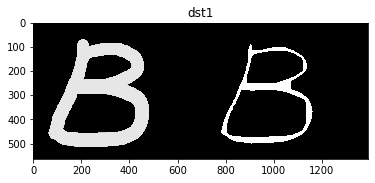

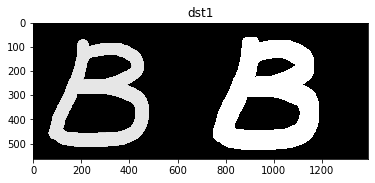

In [17]:
src = cv2.imread('letterb.png', 0)

_, src_bin = cv2.threshold(src, 0 ,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # otsu알고리즘은 알아서 찾아줘서 0 으로줘도됨.

                                                                              # 필요없는 값을 받을때는 '_' 로 받음

# erode(침식)
dst1 = cv2.erode(src_bin, None)
for i in range(15):
    dst1 = cv2.erode(dst1, None)
imshow('dst1',np.hstack((src,dst1)))


# dilate(팽창)
dst2 = cv2.dilate(src_bin, None)
for i in range(10):
    dst2 = cv2.dilate(dst2, None)
imshow('dst1',np.hstack((src,dst2)))


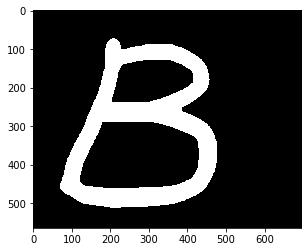

In [18]:
dst1 = cv2.erode(src_bin, None, iterations = 5) # iterations = n -> n번 수헹하겠다.
imshow('', dst1)

In [32]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))  # 십자가 모양 형태소
print(kernel)

[[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]


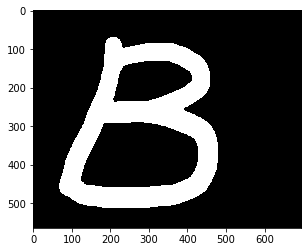

In [23]:
dst1= cv2.erode(src_bin, kernel, iterations=1)
imshow('', dst1)

# 열림 / 닫힌 연산
- 열림 연산 : 침식 -> 팽창 (전체적인 모양 유지 & 주변 잡음 제거) , 주변 잡음 제거 하면서 원본의 특성을 유지
- 닫힘 연산 : 팽창 -> 침식 (원래 데이터 갯수하고 비슷해짐) & 흩어져있던 것을 뭉치는 효과가 있음. 홀을 채우면서도 원래 형태를 유지

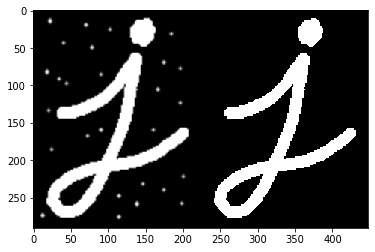

In [41]:
# OPEN 연산 -> 주변 잡음 제거

src = cv2.imread('open.png', 0)
_, src_bin = cv2.threshold(src, 0 ,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, kernel)

imshow('', np.hstack((src,dst1)))

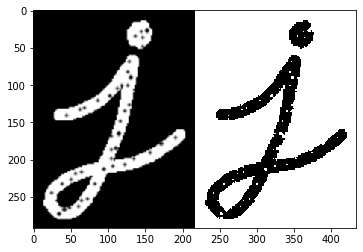

In [47]:
# CLOSE 연산 -> 잡음 제거(내부 홀 채움)

src = cv2.imread('close.png', 0)
_, src_bin = cv2.threshold(src, 0 ,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel)

imshow('', np.hstack((src,dst1)))

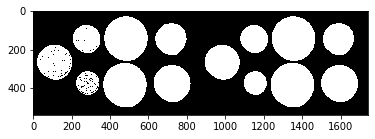

In [50]:
src = cv2.imread('coins.png', 0)
_, src_bin = cv2.threshold(src, 0 ,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
src_bin = 255 - src_bin
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel)

imshow('', np.hstack((src_bin,dst1)))

# 보통 Object는 흰색 / 배경은 검은색으로 이진화함.

# 소만 찾아내보기

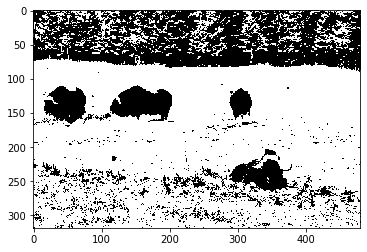

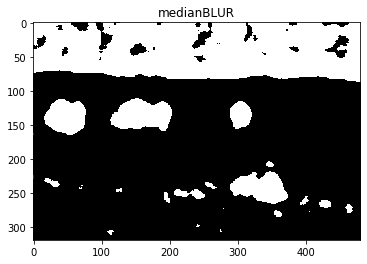

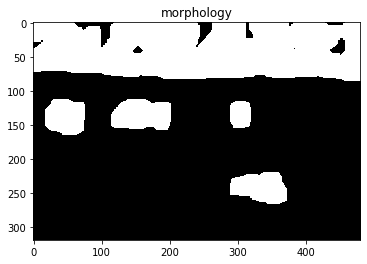

In [212]:
src = cv2.imread('cow.jpg', 0)
_, src_bin = cv2.threshold(src, 0 ,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

imshow('', src_bin)

src_bin = 255 - src_bin  # 밝은 것을 오브젝트로 하고 하자!


dst2 = cv2.medianBlur(src_bin,11)  # 노이즈 제거 : 미디언 블러
imshow("medianBLUR", dst2)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))   # 큼직한 노이즈 제거 : 모폴로지

dst1 = cv2.morphologyEx(dst2, cv2.MORPH_ERODE, kernel, iterations=3)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_DILATE, None, iterations=8)

imshow('morphology', dst1)

# contour점 찾고, 윤곽선 찾기

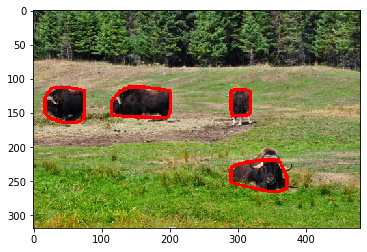

In [213]:
contours, hierarchy = cv2.findContours(dst1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# print(contours)

src = cv2.imread('cow.jpg')

for contour in contours:
    if cv2.contourArea(contour) > 1000 and cv2.contourArea(contour) < 4000:
        hull = cv2.convexHull(contour)
        cv2.drawContours(src, [hull], 0,(0,0,255), 3)
        
imshow("", src)

# 책 찾아보기

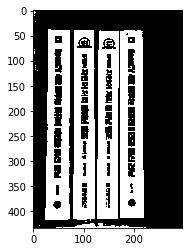

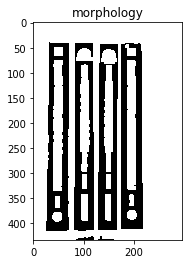

In [221]:
src = cv2.imread('book1.png', 0)
_, src_bin = cv2.threshold(src, 216 ,255, cv2.THRESH_BINARY)

imshow('', src_bin)

src_bin = 255 - src_bin  # 밝은 것을 오브젝트로 하고 하자!


# dst2 = cv2.medianBlur(src_bin,11)  # 노이즈 제거 : 미디언 블러
# imshow("medianBLUR", dst2)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (2,2))   # 큼직한 노이즈 제거 : 모폴로지

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel, iterations=2)
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_DILATE, None, iterations=2)

imshow('morphology', dst1)

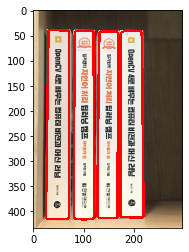

In [241]:
contours, hierarchy = cv2.findContours(dst1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# print(contours)

src = cv2.imread('book1.png')

for contour in contours:
    if cv2.contourArea(contour) > 10000 and cv2.contourArea(contour) < 20000: 
        hull = cv2.convexHull(contour)
        cv2.drawContours(src, [hull], 0,(0,0,255), 3)
        
imshow("", src)

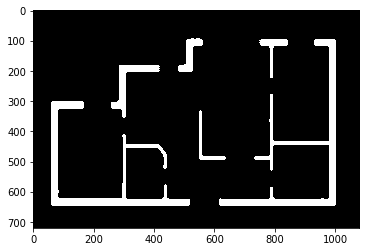

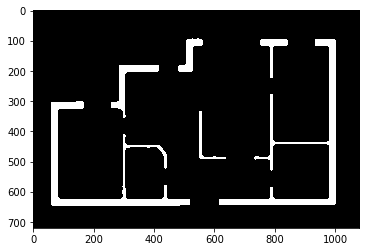

In [169]:
img = cv2.imread('draw.png', 0)
_, src_bin = cv2.threshold(img, 70 ,255, cv2.THRESH_BINARY)

src_bin = 255- src_bin
src_bin = cv2.medianBlur(src_bin, 11)
imshow('', src_bin)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))   # 큼직한 노이즈 제거 : 모폴로지

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_DILATE, None)


imshow('', dst1)

In [170]:
col = np.zeros((dst1.shape[0], dst1.shape[1], 3), dtype="uint8")
col

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

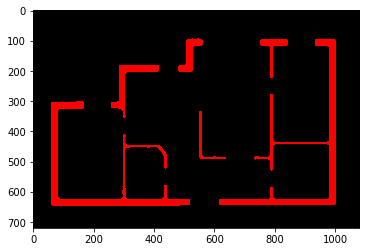

In [171]:
col[:,:,2] = dst1
imshow("", col)

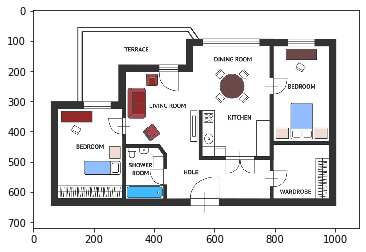

In [172]:
img_color = cv2.imread('draw.png')
imshow('', img_color)

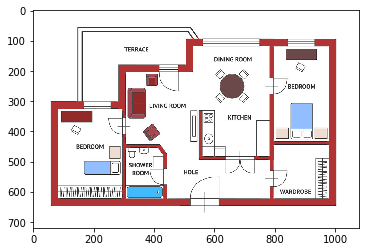

In [175]:
dst2 = cv2.addWeighted(img_color, 1.0, col, 0.5, 0.0)
imshow("", dst2)

ValueError: could not broadcast input array from shape (720,1080,3) into shape (720,1080)

# 형태학적인 그라디언트(밝기변화)
- 침식(erode) 후에 빼버리면 외과성분만 남을 것임.
- 골격화

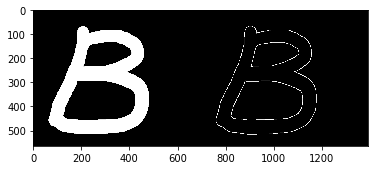

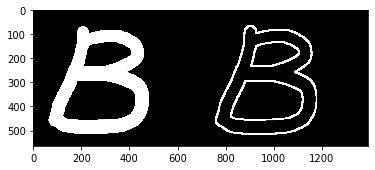

In [180]:
src = cv2.imread('letterb.png', 0)  # 외곽선 따기

dst1 = cv2.morphologyEx(src,cv2.MORPH_GRADIENT, None)  # Gradient -> 골격을 보여줌.
imshow('', np.hstack((src,dst1)))

dst1 = cv2.dilate(dst1, None, iterations = 3)  # 세번 반복
imshow('',np.hstack((src, dst1)))

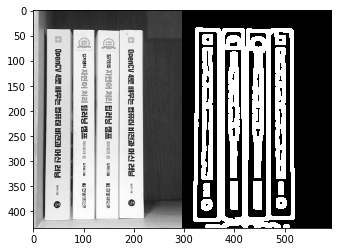

In [209]:
src = cv2.imread('book1.png', 0)
_,src_bin = cv2.threshold(src, 214, 255, cv2.THRESH_BINARY)

src_bin = 255 - src_bin
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_GRADIENT, None)

dst1 = cv2.dilate(dst1, None, iterations = 3)  # 세번 반복
imshow('',np.hstack((src, dst1)))

# 골격화
- 원본 - OPEN 함수 = 노이즈만 나옴
- 노이즈영상을 OR로 계속 중첩(누적)시킴 -> 골격만 나온다.

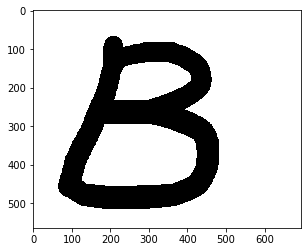

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

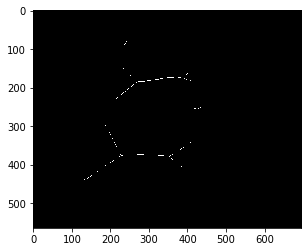

In [245]:
src = cv2.imread('letterb.png', 0)  # 외곽선 따기

_, src_bin = cv2.threshold(src, 127 ,255, cv2.THRESH_BINARY)

src_bin = 255 - src_bin

skel = src_bin.copy()
imshow('', src_bin)

skel[:,:] = 0   # 모든 원소의 값을 0으로 집어 넣어라. = np.zeros() 랑 같은 방법
kernel =  cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))


i = 0
while True:
    print(i)
    i += 1
    eroded = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel)
    temp = cv2.morphologyEx(eroded, cv2.MORPH_DILATE, kernel)
    temp = cv2.subtract(src_bin, temp)
    skel = cv2.bitwise_or(skel, temp)
    src_bin[:,:] = eroded[:,:]
    if cv2.countNonZero(src_bin) == 0:
        break
    

imshow('',skel)

# 컬러

(512, 512, 3)


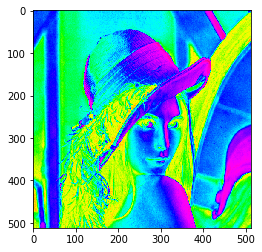

In [249]:
im_gray = cv2.imread('lenna.bmp', 0)
im_color = cv2.applyColorMap(im_gray, cv2.COLORMAP_HSV)
print(im_color.shape)
imshow('', im_color)

# 빨간색 부분만 추출하고싶다,

In [251]:
img = cv2.imread('detectcirclesexample.png')

img.shape



(484, 692, 3)

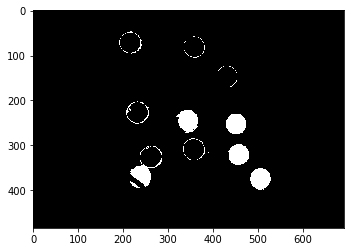

In [256]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red = (0, 50, 50)
upper_red = (10, 255, 255)
img_mask = cv2.inRange(img_hsv, lower_red, upper_red)

imshow('', img_mask)

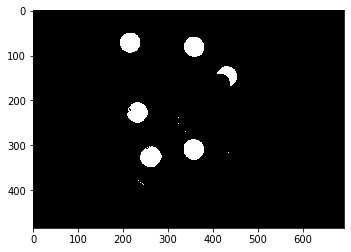

In [257]:
lower_red = np.array([170, 50,50])
upper_red = np.array([180, 255, 255])

img_mask2 = cv2.inRange(img_hsv, lower_red, upper_red)
imshow('', img_mask2)

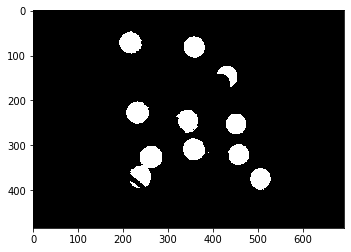

In [259]:
# 최종 붉은색 계열의 물체 합침

added_red = cv2.addWeighted(img_mask, 1.0, img_mask2, 1.0, 0.0)
imshow('', added_red)

# yellow

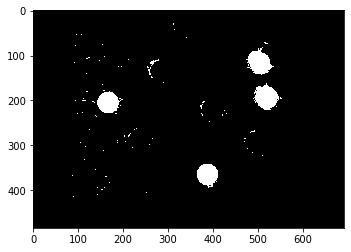

In [262]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red = (25, 50, 50)
upper_red = (35, 255, 255)
img_mask = cv2.inRange(img_hsv, lower_red, upper_red)

imshow('', img_mask)

# blue

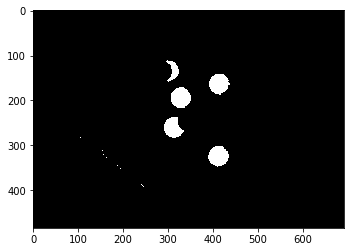

In [263]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red = (110, 50, 50)
upper_red = (120, 255, 255)
img_mask = cv2.inRange(img_hsv, lower_red, upper_red)

imshow('', img_mask)

# 히스토그램으로 색 나타내기
- 위치값보다는 색의 분포를 활용해서 문제를 풀 수 있는 방식

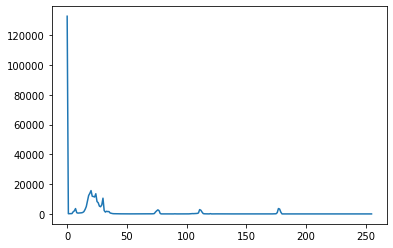

In [264]:
hist_h = cv2.calcHist([img_hsv],[0],None,[256],[0,256])
plt.plot(hist_h)

(array([], dtype=int64), array([], dtype=int64))


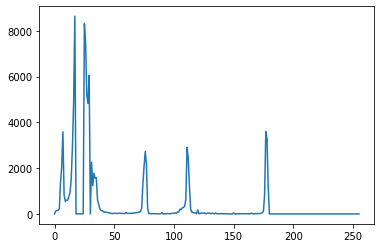

In [267]:
h = np.where( hist_h > 10000)  # np.where함수 -> 값이 10000보다 큰 것들의 인덱스를 가져와 줌,
print(h)
hist_h[h[0]] = 0
plt.plot(hist_h)

# KMeans로 풀기

In [269]:
from sklearn.cluster import KMeans
X =img_hsv[:,:,0].flatten().reshape(-1,1)
print(X.shape)

(334928, 1)


In [271]:
model = KMeans(n_clusters = 7, init = 'random', max_iter=20).fit(X)
p = model.cluster_centers_
print(p)

[[ 30.33744889]
 [ 23.26976143]
 [  0.40738468]
 [111.84747465]
 [177.01485995]
 [ 17.8943856 ]
 [ 74.99865772]]


# bird

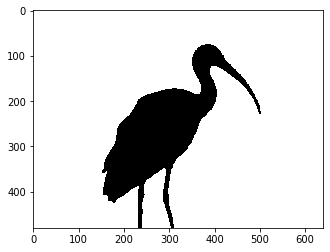

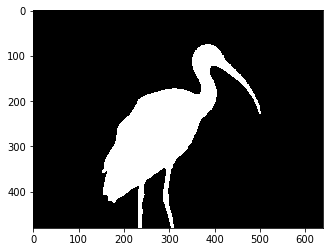

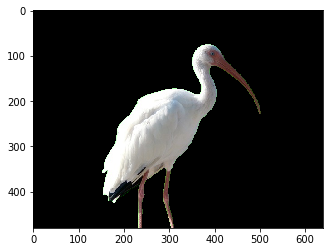

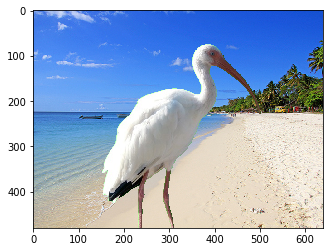

In [273]:
img = cv2.imread("chroma.jpg")
img2 = cv2.imread("beach.png")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_chroma = (60-10, 100, 100)
upper_chroma = (60+10, 255, 255)

green_screen = cv2.inRange(img_hsv, lower_chroma, upper_chroma)

inverted = cv2.bitwise_not(green_screen)
dst = cv2.bitwise_and(img, img, mask=inverted)   #세그멘테이션(전경)

dst1 = cv2.bitwise_or(dst, img2, mask=green_screen)   # 배경만 취한다.
dst1 = cv2.bitwise_or(dst, dst1)                      #전경더한다.  dst1 = dst + dst1

imshow("", green_screen)
imshow("", inverted)
imshow("", dst)
imshow("", dst1)

# video 에서 컬러 검출

In [282]:
cap = cv2.VideoCapture('tennis_ball.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()        
    if not ret : break
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = (30, 10, 10)
    upper_red = (38, 255, 255)
    mask = cv2.inRange(hsv, lower_red, upper_red)
    
    kernel = np.ones((15,15),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    if cv2.waitKey(10) == 27:
        break
    
cap.release()
cv2.destroyAllWindows()